In [1]:
from library_dicom.post_processing.Mask import *
import numpy as np
from library_dicom.dicom_processor.tools.create_mip import *
import matplotlib.pyplot as plt

In [2]:
from radiomics.featureextractor import *

In [3]:
from sklearn import mixture

In [4]:
import SimpleITK as sitk  
mask_path = r'C:\Users\wendy\Documents\STAGE\1.2.124.113532.172.16.25.2.20130717.529.1327224_nifti_mask.nii'
pet_path = r'C:\Users\wendy\Documents\STAGE\1.2.124.113532.172.16.25.2.20130717.529.1327224_nifti_PT.nii'

In [5]:
mask_object = Mask(mask_path, pet_path)

In [6]:
binary_mask = mask_object.binary_mask
print(binary_mask.shape)

(169, 169, 255)


In [7]:
labelled_mask = mask_object.get_label()[0]

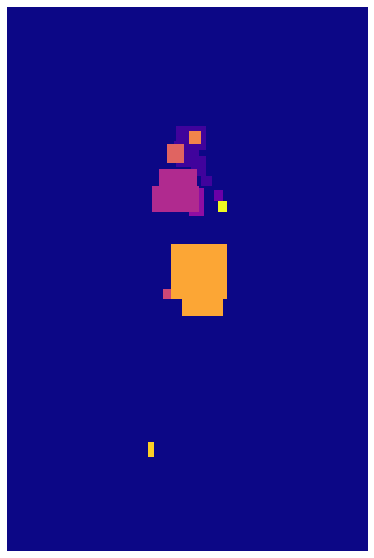

In [8]:
#from tools
mip_imshow(labelled_mask, 0)

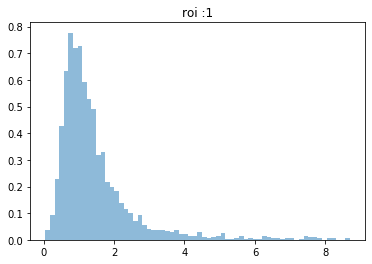

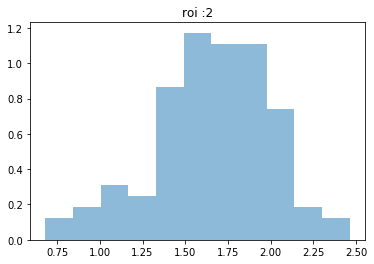

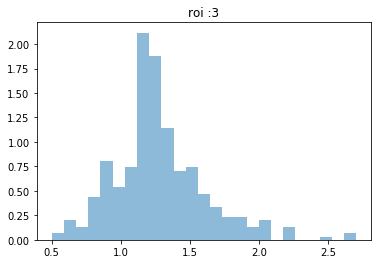

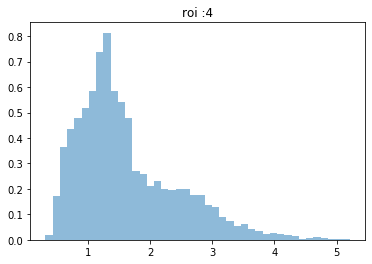

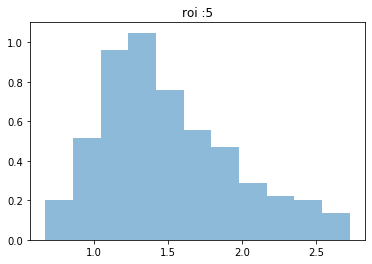

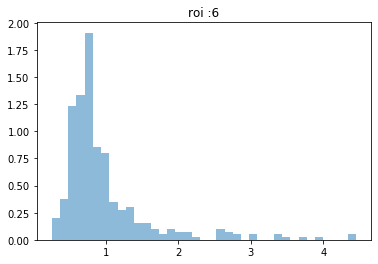

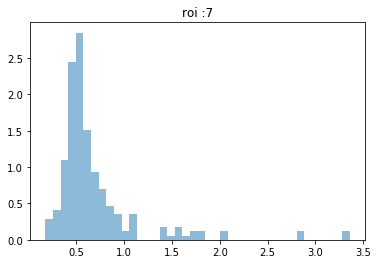

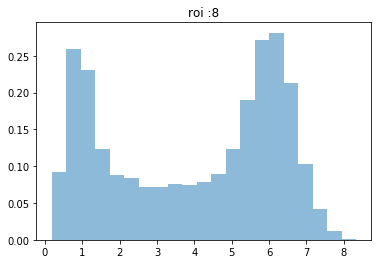

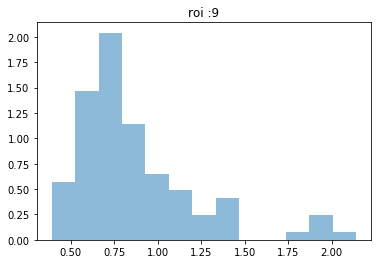

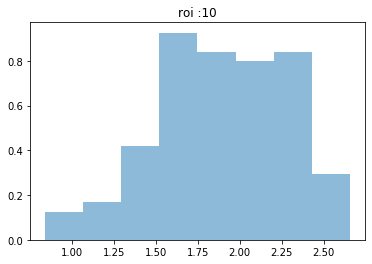

In [11]:
mask_object.get_roi_histogram(dict)

In [169]:
X_train = dict[1]['suv_values']
X_train = np.asarray(X_train)

In [170]:
np.max(X_train)

8.686473099198086

In [183]:
gmm = mixture.GaussianMixture(n_components=6, covariance_type= 'full')
print(X_train.shape)
X_train = np.reshape(X_train, ((-1, 1)))
print(X_train.shape)


(2586, 1)
(2586, 1)


In [184]:
gmm.fit(X_train)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [185]:
gmm.bic(X_train)

5799.265119335835

In [186]:
gmm_x = np.linspace(0, np.max(X_train), X_train.shape[0])
gmm_y = np.exp(gmm.score_samples(gmm_x.reshape(-1,1)))


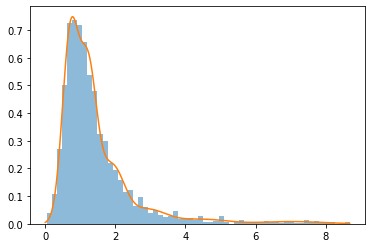

In [187]:
plt.hist(X_train, bins = 60, normed = True, alpha = 0.5)
plt.plot(gmm_x, gmm_y)

In [13]:
pt = mask_object.pet_img
print(mask_object.pet_direction)
print(mask_object.pet_origin)
print(mask_object.pet_size)
print(mask_object.pet_spacing)

(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(-336.68359375, -266.68359375, 727.300048828125)
(169, 169, 255)
(4.0, 4.0, 4.0)


In [14]:
print(mask_object.mask_direction)
print(mask_object.mask_origin)
print(mask_object.mask_size)
print(mask_object.mask_spacing)

(1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
(-336.68359375, -266.68359375, 727.300048828125, 0.0)
(169, 169, 255, 18)
(4.0, 4.0, 4.0, 1.0)


In [15]:
mask_img = mask_object.get_binary_mask_img(labelled_mask)
print(mask_img.GetDirection())
print(mask_img.GetSize())
print(mask_img.GetSpacing())

(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(169, 169, 255)
(4.0, 4.0, 4.0)


In [16]:
number_of_key = len(dict)
print(number_of_key)

10


In [17]:
mask_object.extract_features(pt, mask_img)

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


{1: {'volume': 165.504,
  'percentil_10': array(0.56666505),
  'percentil_90': array(2.59123733),
  'interquartile': array(0.91007124),
  'entropy': array(-3.2034265e-16),
  'maximum': array(8.6864731),
  'minimum': array(0.05021083),
  'mean': array(1.45043746),
  'mean_abs_dev': array(0.73717762),
  'median': array(1.13691659),
  'variance': array(1.30559797),
  'uniformity': array(1.),
  'kurtosis_value': array(13.50121004),
  'kurtosis_label': 'Leptokurtic',
  'skewness_value': array(2.83856423),
  'skewness_label': 'Left Distribution'},
 2: {'volume': 6.4,
  'percentil_10': array(1.2194058),
  'percentil_90': array(2.05649202),
  'interquartile': array(0.39361702),
  'entropy': array(-3.2034265e-16),
  'maximum': array(2.46391702),
  'minimum': array(0.68143265),
  'mean': array(1.660221),
  'mean_abs_dev': array(0.25963875),
  'median': array(1.69102893),
  'variance': array(0.11263498),
  'uniformity': array(1.),
  'kurtosis_value': array(3.42637086),
  'kurtosis_label': 'Leptok

In [15]:
extractor = RadiomicsFeatureExtractor()

extractor.execute(pt, mask_img, label = 2) # = results

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


OrderedDict([('diagnostics_Versions_PyRadiomics', 'v3.0'),
             ('diagnostics_Versions_Numpy', '1.16.5'),
             ('diagnostics_Versions_SimpleITK', '1.2.3'),
             ('diagnostics_Versions_PyWavelet', '1.0.0'),
             ('diagnostics_Versions_Python', '3.7.4'),
             ('diagnostics_Configuration_Settings',
              {'minimumROIDimensions': 2,
               'minimumROISize': None,
               'normalize': False,
               'normalizeScale': 1,
               'removeOutliers': None,
               'resampledPixelSpacing': None,
               'interpolator': 'sitkBSpline',
               'preCrop': False,
               'padDistance': 5,
               'distances': [1],
               'force2D': False,
               'force2Ddimension': 0,
               'resegmentRange': None,
               'label': 2,
               'additionalInfo': True}),
             ('diagnostics_Configuration_EnabledImageTypes', {'Original': {}}),
             ('diagnost

In [35]:
type(results['original_shape_VoxelVolume'])

numpy.float64